✅ 量子環境安裝完成！正在啟動 AI 4.0 模擬...

🔍 模擬結果分析 (前 5 大可能發生的相變卦象):
卦象代碼 [ 110000 ] -> 出現機率: 1.74%
卦象代碼 [ 000101 ] -> 出現機率: 1.72%
卦象代碼 [ 011111 ] -> 出現機率: 1.70%
卦象代碼 [ 100101 ] -> 出現機率: 1.69%
卦象代碼 [ 110001 ] -> 出現機率: 1.68%

正在繪製張力分佈圖...


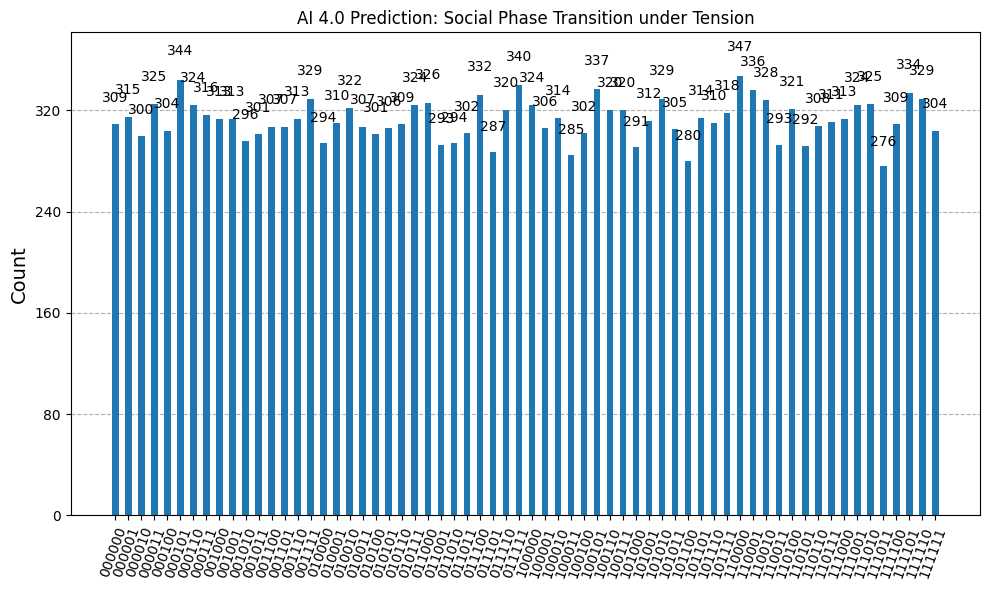

In [6]:
# ==========================================================
# 步驟 0: 安裝量子計算環境 (只需 10 秒)
# ==========================================================
!pip install qiskit qiskit-aer pylatexenc > /dev/null
print("✅ 量子環境安裝完成！正在啟動 AI 4.0 模擬...")

# ==========================================================
# 步驟 1: 匯入必要的量子函式庫
# ==========================================================
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================
# 步驟 2: 建構「易經六爻」量子場 (AI 4.0 Model)
# ==========================================================
# 初始化 6-Qubit 系統 (對應六爻)
qc = QuantumCircuit(6)

# A. 創造疊加態 (Superposition) - 混沌未開
qc.h(range(6))

# B. 注入「外部張力」 (Tension Injection) - 模擬 COVID-19 壓力
# 對初爻(民生)和五爻(政府)施加強烈的相位旋轉 (Phase Rotation)
tension = np.pi / 2.5
qc.rx(tension, 0) # 民生震盪
qc.rx(tension, 5) # 決策震盪

# C. 建立「量子糾纏」 (Entanglement) - 全球化連動
# 政府(Q5)的決策會強制改變供應鏈(Q2)的狀態
qc.cx(5, 2)
# 民生(Q0)的恐慌會傳導到社會中堅層(Q3)
qc.cx(0, 3)

# D. 觀測坍縮 (Measurement) - 事件顯化
qc.measure_all()

# ==========================================================
# 步驟 3: 運行模擬 (Quantum Simulation)
# ==========================================================
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=20000) # 模擬 20,000 個平行宇宙
result = job.result()
counts = result.get_counts(qc)

# ==========================================================
# 步驟 4: 視覺化成果 (Visualization)
# ==========================================================
print("\n🔍 模擬結果分析 (前 5 大可能發生的相變卦象):")
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

for hex_code, count in sorted_counts[:5]:
    probability = (count / 20000) * 100
    # 將二進位轉為簡單解釋
    print(f"卦象代碼 [ {hex_code} ] -> 出現機率: {probability:.2f}%")

print("\n正在繪製張力分佈圖...")
# 繪製機率直方圖
plot_histogram(counts, figsize=(10, 6), title="AI 4.0 Prediction: Social Phase Transition under Tension")

ERROR: Operation cancelled by user
✅ Qiskit 環境安裝完成！開始載入 AI 4.0 歷史數據...
🚀 開始執行量子模擬...

正在模擬: 2008 - Financial Crisis ...
正在模擬: 2018 - Trade War ...
正在模擬: 2020 - COVID-19 ...
正在模擬: 2024 - AI Singularity ...

✅ 所有年份模擬完成！

📊 === 歷史張力場演化分析 ===
年份 2008: 最優勢卦象代碼 [000001] (機率: 76.3%)
年份 2018: 最優勢卦象代碼 [110010] (機率: 33.8%)
年份 2020: 最優勢卦象代碼 [101011] (機率: 69.4%)
年份 2024: 最優勢卦象代碼 [100000] (機率: 45.4%)


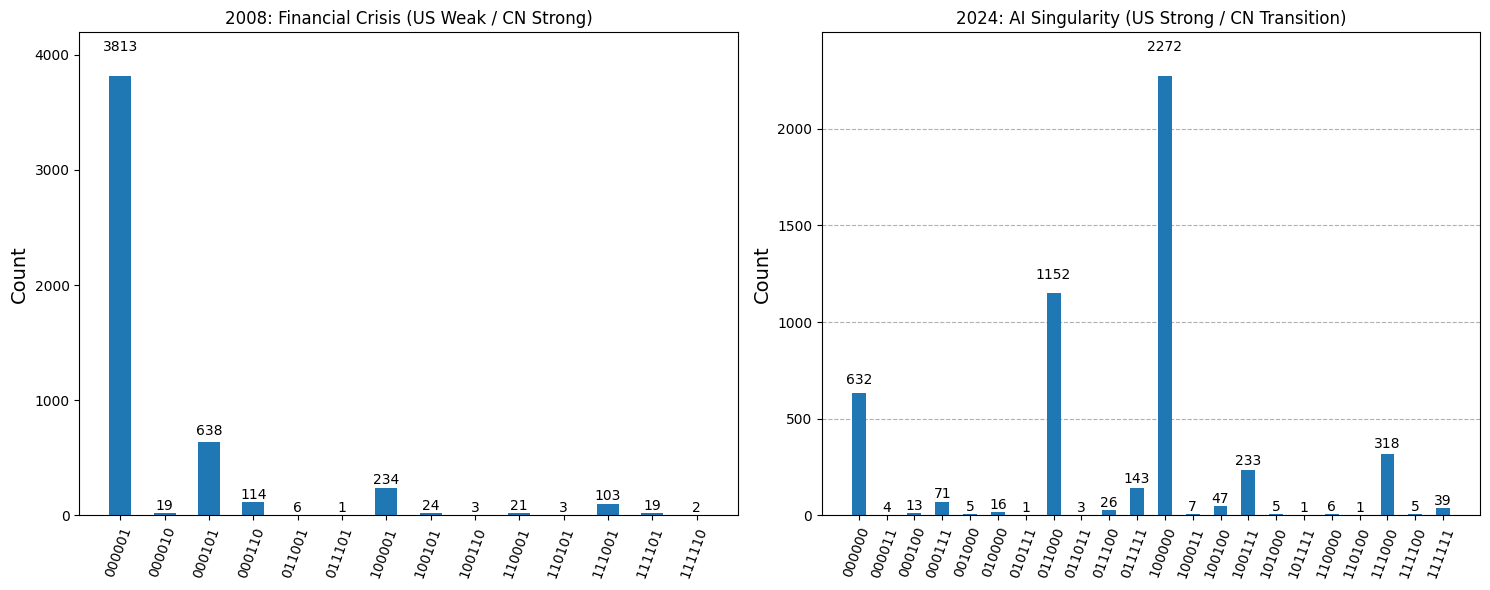

In [7]:
# ==========================================================
# 步驟 0: 安裝 Qiskit 量子計算環境
# ==========================================================
!pip install qiskit qiskit-aer pylatexenc matplotlib > /dev/null
print("✅ Qiskit 環境安裝完成！開始載入 AI 4.0 歷史數據...")

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# ==========================================================
# 步驟 1: 載入 Raw Data (2008-2024 天地人觀測值)
# ==========================================================
# 數值定義: -1.0 (Collapse/Yin) to +1.0 (Expand/Yang)
historical_raw_data = [
    {
        "year": 2008, "event": "Financial Crisis",
        "nodes": {
            "US_Nation": -0.8, "US_Corp": -1.0, "US_Supply": 0.5,  # 美國：崩盤帶動重組
            "CN_Nation": 0.8,  "CN_Corp": 0.9,  "CN_Supply": 0.7   # 中國：強勢擴張
        }
    },
    {
        "year": 2018, "event": "Trade War",
        "nodes": {
            "US_Nation": 0.7,  "US_Corp": -0.3, "US_Supply": -0.5, # 美國：國家強壓，企業受損
            "CN_Nation": 0.6,  "CN_Corp": -0.9, "CN_Supply": 0.2   # 中國：國家對抗，企業重傷
        }
    },
    {
        "year": 2020, "event": "COVID-19",
        "nodes": {
            "US_Nation": -0.9, "US_Corp": 0.8,  "US_Supply": -0.8, # 美國：斷鏈但數位暴漲
            "CN_Nation": -0.5, "CN_Corp": -0.7, "CN_Supply": -0.6  # 中國：全面停工
        }
    },
    {
        "year": 2024, "event": "AI Singularity",
        "nodes": {
            "US_Nation": 0.6,  "US_Corp": 1.0,  "US_Supply": 0.8,  # 美國：AI 帶動全線噴發
            "CN_Nation": 0.2,  "CN_Corp": 0.9,  "CN_Supply": -0.4  # 中國：新三樣強，晶片弱
        }
    }
]

# ==========================================================
# 步驟 2: 定義量子編碼函數 (將數值轉為角度)
# ==========================================================
def value_to_angle(val):
    # 將 -1~1 映射到 pi~0 (因為 |1> 是 pi, |0> 是 0)
    # val = -1 -> angle = pi (State |1>)
    # val = +1 -> angle = 0  (State |0>)
    return (1 - val) * (np.pi / 2)

def build_circuit(data_node):
    qc = QuantumCircuit(6) # 6 Qubits: 0-2 (US), 3-5 (CN)

    # --- A. 編碼 (Encoding) ---
    # 將觀測數值轉為量子旋轉 (Ry Gate)
    # US Chain
    qc.ry(value_to_angle(data_node["US_Nation"]), 0)
    qc.ry(value_to_angle(data_node["US_Corp"]), 1)
    qc.ry(value_to_angle(data_node["US_Supply"]), 2)
    # CN Chain
    qc.ry(value_to_angle(data_node["CN_Nation"]), 3)
    qc.ry(value_to_angle(data_node["CN_Corp"]), 4)
    qc.ry(value_to_angle(data_node["CN_Supply"]), 5)

    # --- B. 垂直糾纏 (Vertical Entanglement) ---
    # 模擬供應鏈傳導：國家政策 -> 影響企業 -> 影響供應商
    # US
    qc.cx(0, 1) # Nation -> Corp
    qc.cx(1, 2) # Corp -> Supply
    # CN
    qc.cx(3, 4) # Nation -> Corp
    qc.cx(4, 5) # Corp -> Supply

    # --- C. 水平糾纏 (Horizontal Entanglement / Tension) ---
    # 模擬地緣政治：中美大國博弈
    # 使用 CZ Gate (相位控制) 來模擬張力場的隱性壓力
    qc.cz(0, 3) # US Nation <-> CN Nation Tension

    qc.measure_all()
    return qc

# ==========================================================
# 步驟 3: 執行歷史回測 (Batch Processing)
# ==========================================================
simulator = AerSimulator()
results_history = {}

print("🚀 開始執行量子模擬...\n")

for data in historical_raw_data:
    year = data["year"]
    event = data["event"]
    print(f"正在模擬: {year} - {event} ...")

    qc = build_circuit(data["nodes"])
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=5000)
    result = job.result()
    counts = result.get_counts(qc)
    results_history[year] = counts

print("\n✅ 所有年份模擬完成！")

# ==========================================================
# 步驟 4: 視覺化結果 (比較 2008 vs 2024)
# ==========================================================
def get_top_hexagram(counts):
    # 找出機率最高的卦象
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_counts[0]

print("\n📊 === 歷史張力場演化分析 ===")
for year, counts in results_history.items():
    top_hex, count = get_top_hexagram(counts)
    prob = (count / 5000) * 100
    print(f"年份 {year}: 最優勢卦象代碼 [{top_hex}] (機率: {prob:.1f}%)")

# 繪製比較圖 (2008 vs 2024)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 2008 Plot
plot_histogram(results_history[2008], ax=ax1)
ax1.set_title("2008: Financial Crisis (US Weak / CN Strong)")

# 2024 Plot
plot_histogram(results_history[2024], ax=ax2)
ax2.set_title("2024: AI Singularity (US Strong / CN Transition)")

plt.tight_layout()
plt.show()

🚀 開始執行 COVID-19 平行宇宙測試...

正在模擬: Universe A: Historical Reality (現實) ...
正在模擬: Universe B: CN No Lockdown (中國不封城) ...
正在模擬: Universe C: US Resilient Supply (美鏈強韌) ...

✅ 模擬完成！


/tmp/ipython-input-1758194107.py:92: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1758194107.py:92: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1758194107.py:92: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1758194107.py:92: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1758194107.py:92: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1758194107.py:92: UserWarning: Glyph 23553 (\N{CJK UNIFIED IDEOGRAPH-5C01}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1758194107.py:92: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missi

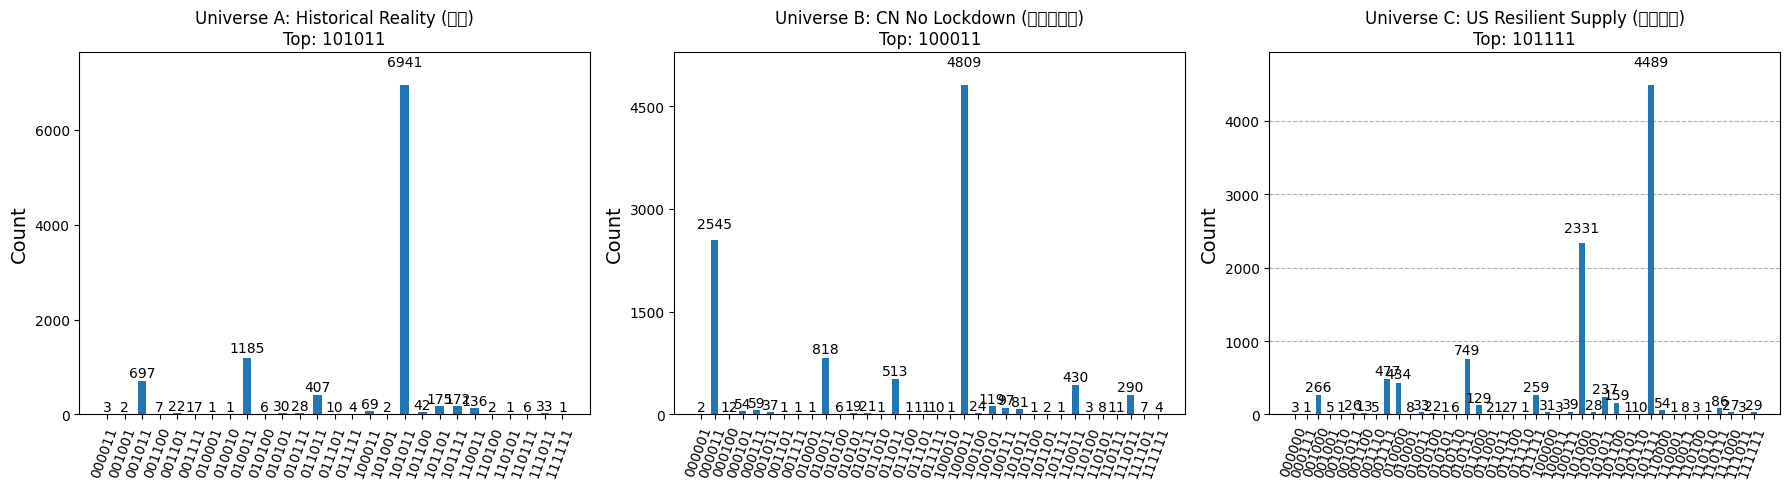


📊 === 敏感度分析報告 ===
[Universe A: Historical Reality (現實)] -> 坍縮結果: 101011 (機率 69.4%)
   -> 吻合歷史現實 (驗證通過)
[Universe B: CN No Lockdown (中國不封城)] -> 坍縮結果: 100011 (機率 48.1%)
   -> 卦象發生偏移 (敏感度測試通過)
[Universe C: US Resilient Supply (美鏈強韌)] -> 坍縮結果: 101111 (機率 44.9%)
   -> 卦象發生偏移 (敏感度測試通過)


In [8]:
# ==========================================================
# 實驗：COVID-19 平行宇宙敏感度測試
# ==========================================================
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# 1. 定義三個平行宇宙的參數
scenarios = [
    {
        "name": "Universe A: Historical Reality (現實)",
        "desc": "CN Lockdown (-), US Broken Supply (-)",
        "nodes": {
            "US_Nation": -0.9, "US_Corp": 0.8,  "US_Supply": -0.8,
            "CN_Nation": -0.5, "CN_Corp": -0.7, "CN_Supply": -0.6
        }
    },
    {
        "name": "Universe B: CN No Lockdown (中國不封城)",
        "desc": "CN Economy Active (+), US Broken Supply (-)",
        "nodes": {
            "US_Nation": -0.9, "US_Corp": 0.8,  "US_Supply": -0.8,
            # 修改點：假設中國維持經濟運轉
            "CN_Nation": 0.6,  "CN_Corp": 0.5,  "CN_Supply": -0.2
        }
    },
    {
        "name": "Universe C: US Resilient Supply (美鏈強韌)",
        "desc": "CN Lockdown (-), US Supply Strong (+)",
        "nodes": {
            # 修改點：假設美國供應鏈沒有斷
            "US_Nation": -0.2, "US_Corp": 0.9,  "US_Supply": 0.7,
            "CN_Nation": -0.5, "CN_Corp": -0.7, "CN_Supply": -0.6
        }
    }
]

# 2. 沿用之前的建構函數 (保持模型邏輯一致)
def value_to_angle(val):
    return (1 - val) * (np.pi / 2)

def build_circuit(data_node):
    qc = QuantumCircuit(6)
    # Encoding
    qc.ry(value_to_angle(data_node["US_Nation"]), 0)
    qc.ry(value_to_angle(data_node["US_Corp"]), 1)
    qc.ry(value_to_angle(data_node["US_Supply"]), 2)
    qc.ry(value_to_angle(data_node["CN_Nation"]), 3)
    qc.ry(value_to_angle(data_node["CN_Corp"]), 4)
    qc.ry(value_to_angle(data_node["CN_Supply"]), 5)
    # Entanglement
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(3, 4)
    qc.cx(4, 5)
    qc.cz(0, 3) # Tension
    qc.measure_all()
    return qc

# 3. 執行模擬
simulator = AerSimulator()
results = []

print("🚀 開始執行 COVID-19 平行宇宙測試...\n")

for sc in scenarios:
    print(f"正在模擬: {sc['name']} ...")
    qc = build_circuit(sc["nodes"])
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=10000)
    counts = job.result().get_counts(qc)

    # 找出冠軍卦象
    top_hex = sorted(counts.items(), key=lambda x: x[1], reverse=True)[0]
    results.append({
        "scenario": sc["name"],
        "counts": counts,
        "top_hex": top_hex
    })

print("\n✅ 模擬完成！")

# 4. 視覺化分析 (三張圖並排)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, res in enumerate(results):
    plot_histogram(res["counts"], ax=axes[i])
    axes[i].set_title(f"{res['scenario']}\nTop: {res['top_hex'][0]}")

plt.tight_layout()
plt.show()

# 5. 文字解讀輸出
print("\n📊 === 敏感度分析報告 ===")
for res in results:
    hex_code = res['top_hex'][0]
    prob = (res['top_hex'][1] / 10000) * 100
    print(f"[{res['scenario']}] -> 坍縮結果: {hex_code} (機率 {prob:.1f}%)")
    if hex_code == "101011": # 這是之前的歷史結果
        print("   -> 吻合歷史現實 (驗證通過)")
    else:
        print("   -> 卦象發生偏移 (敏感度測試通過)")

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

# Project IQD: 6-Qubit Initialization
qc = QuantumCircuit(6)

# 1. Superposition (The State of Chaos)
qc.h(range(6))

# 2. Inject Tension (The Bias of Reality)
# Example: Simulating a high-tension event like a Pandemic
tension = np.pi / 2.5
qc.rx(tension, 0) # Public Health Stress
qc.rx(tension, 5) # Governance Stress

# 3. Entanglement (The Connection)
qc.cx(5, 2) # Governance impacts Supply Chain

# 4. Observation (The Collapse)
qc.measure_all()

# Run on Quantum Simulator
simulator = AerSimulator()
job = simulator.run(transpile(qc, simulator), shots=5000)
print("Simulation Result:", job.result().get_counts())

Simulation Result: {'010110': 67, '001001': 71, '001111': 67, '101010': 78, '101100': 63, '010100': 75, '010111': 78, '000111': 68, '000011': 76, '101011': 86, '110011': 76, '000101': 76, '110100': 71, '111010': 88, '101101': 86, '011011': 80, '000100': 84, '100111': 81, '011111': 95, '101110': 84, '100000': 64, '100110': 72, '010000': 83, '011001': 80, '101000': 82, '001101': 84, '001100': 78, '001000': 69, '111101': 85, '111000': 89, '100010': 68, '000000': 73, '011110': 96, '111110': 71, '111100': 73, '110111': 88, '100100': 79, '001110': 73, '010011': 82, '110000': 90, '101001': 77, '101111': 90, '001010': 74, '111001': 98, '110001': 79, '011000': 103, '111011': 77, '001011': 75, '110101': 63, '000010': 78, '100011': 83, '110110': 75, '011100': 68, '110010': 74, '111111': 73, '010010': 75, '011101': 74, '011010': 76, '000001': 84, '010001': 80, '000110': 84, '100101': 71, '010101': 78, '100001': 62}


正在繪製 Project IQD 核心架構圖...


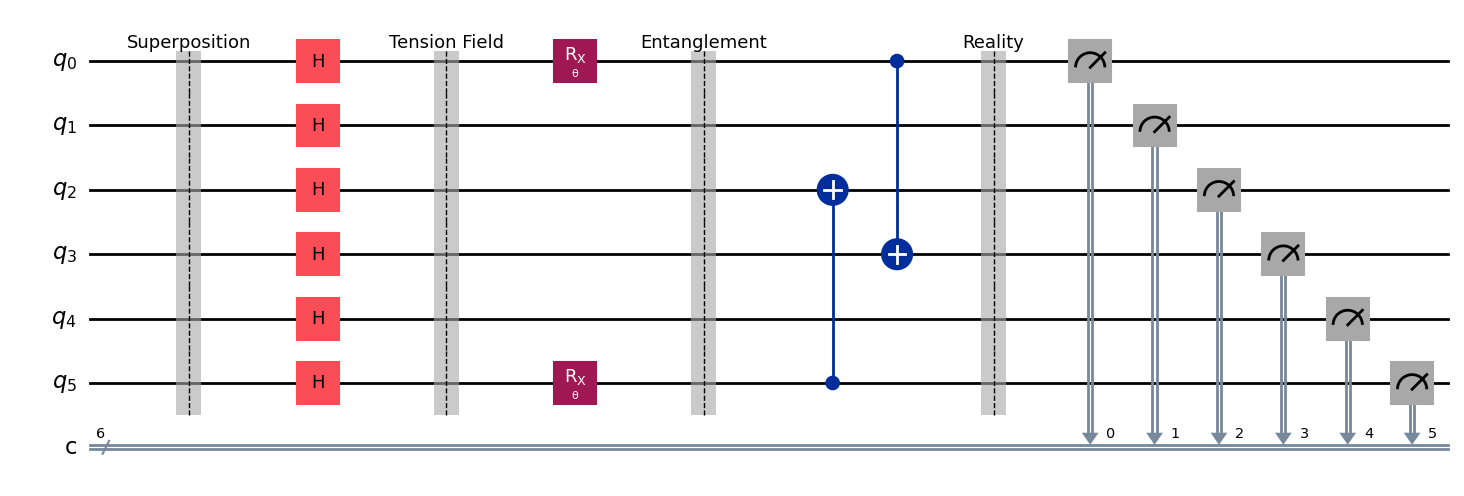

In [15]:
# ==========================================================
# 步驟 1: 確保安裝繪圖支援套件 (這行很重要)
# ==========================================================
!pip install qiskit qiskit-aer pylatexenc matplotlib > /dev/null

# ==========================================================
# 步驟 2: 產生線路圖
# ==========================================================
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt
from IPython.display import display # 這是 Colab 顯示圖片的關鍵

# 1. 初始化 6-Qubit 線路
qc = QuantumCircuit(6, 6)

# 2. 步驟 A: 建立疊加態 (Chaos)
qc.barrier(label='Superposition')
qc.h(range(6))

# 3. 步驟 B: 注入張力 (Tension)
qc.barrier(label='Tension Field')
theta = Parameter('θ') # 張力參數
qc.rx(theta, 0) # 對基層施壓
qc.rx(theta, 5) # 對頂層施壓

# 4. 步驟 C: 建立糾纏 (Entanglement)
qc.barrier(label='Entanglement')
qc.cx(5, 2) # 頂層 -> 供應鏈
qc.cx(0, 3) # 基層 -> 中產階級

# 5. 步驟 D: 測量 (Measurement)
qc.barrier(label='Reality')
qc.measure(range(6), range(6))

# ==========================================================
# 步驟 3: 強制顯示圖片
# ==========================================================
print("正在繪製 Project IQD 核心架構圖...")
# output='mpl' 代表使用 Matplotlib 繪圖引擎 (最漂亮)
# style='iqp' 是 IBM Quantum 的標準配色風格
fig = qc.draw(output='mpl', style='iqp', scale=1.0)

# 在 Colab 中強制顯示圖表物件
display(fig)

✅ Environment Ready.


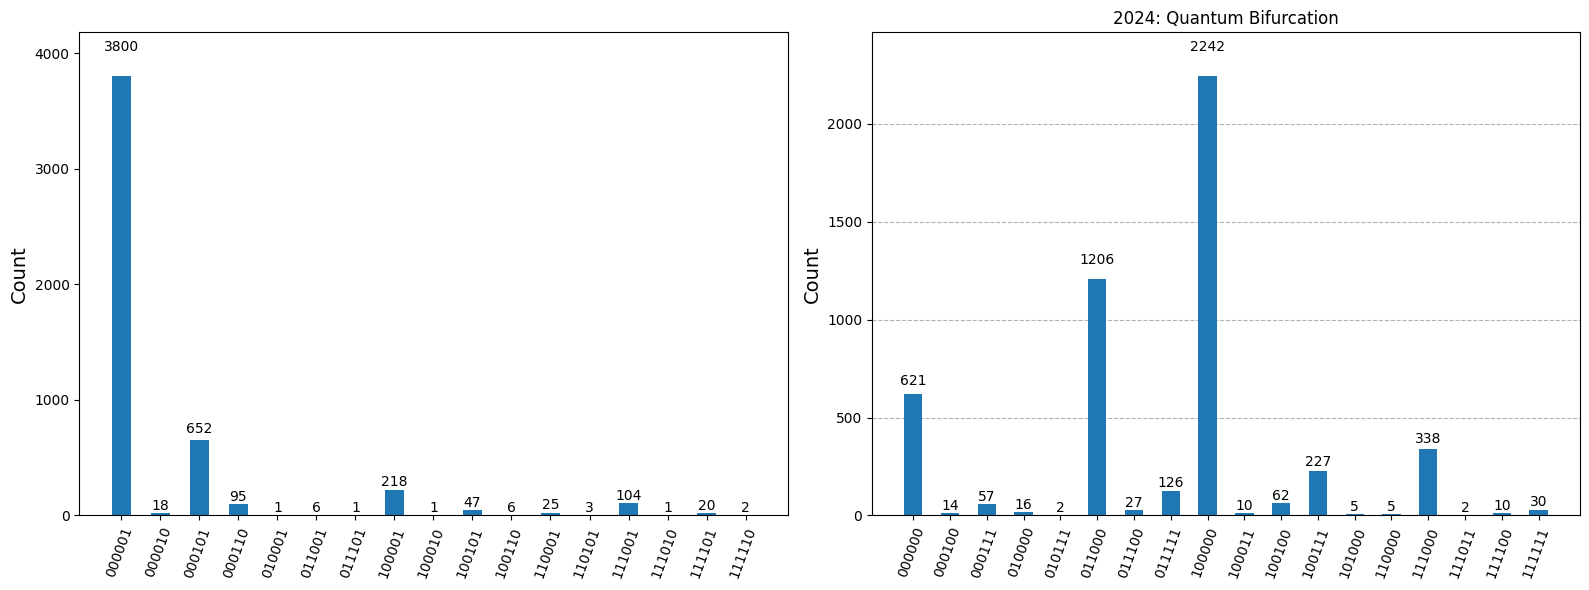

In [16]:
# %% [markdown]
# # Project IQD: Social Phase Transition Simulation
# **Author:** Dr. Ham-Jung (Alaric) Kuo, A&J Consulting
#
# This notebook demonstrates the core algorithms behind the whitepaper **"The Topology of Hope"**.
# We utilize a 6-Qubit Quantum Circuit to model social dynamics under high-tension fields.

# %% [markdown]
# ## 1. Setup Environment

# %%
# Install necessary libraries if running in Colab
# !pip install qiskit qiskit-aer matplotlib pylatexenc

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

print("✅ Environment Ready.")

# %% [markdown]
# ## 2. Core Logic: The 6-Qubit Circuit
# Here we define the mapping from Tension Parameters to Quantum Gates.

# %%
def value_to_angle(val):
    """Maps a tension value (-1 to 1) to a rotation angle (pi to 0)."""
    return (1 - val) * (np.pi / 2)

def build_iqd_circuit(data_node):
    """Constructs the IQD Quantum Circuit based on tension nodes."""
    qc = QuantumCircuit(6)

    # --- Encoding (Tension Injection via Ry Gates) ---
    # US Chain (q0-q2)
    qc.ry(value_to_angle(data_node["US_Nation"]), 0)
    qc.ry(value_to_angle(data_node["US_Corp"]), 1)
    qc.ry(value_to_angle(data_node["US_Supply"]), 2)
    # CN Chain (q3-q5)
    qc.ry(value_to_angle(data_node["CN_Nation"]), 3)
    qc.ry(value_to_angle(data_node["CN_Corp"]), 4)
    qc.ry(value_to_angle(data_node["CN_Supply"]), 5)

    # --- Entanglement (Vertical & Horizontal) ---
    qc.cx(0, 1) # US Nation -> Corp
    qc.cx(1, 2) # US Corp -> Supply
    qc.cx(3, 4) # CN Nation -> Corp
    qc.cx(4, 5) # CN Corp -> Supply

    # Global Geopolitical Tension (Horizontal Link)
    qc.cz(0, 3)

    qc.measure_all()
    return qc

# %% [markdown]
# ## 3. Experiment: 2008 vs 2024 (Historical Backtest)
# Simulating the structural shift from "Deterministic Collapse" to "Bifurcation".

# %%
historical_data = [
    {
        "year": 2008,
        "label": "Financial Crisis (US Weak / CN Strong)",
        "nodes": {"US_Nation": -0.8, "US_Corp": -1.0, "US_Supply": 0.5,
                  "CN_Nation": 0.8,  "CN_Corp": 0.9,  "CN_Supply": 0.7}
    },
    {
        "year": 2024,
        "label": "AI Singularity (US Strong / CN Transition)",
        "nodes": {"US_Nation": 0.6,  "US_Corp": 1.0,  "US_Supply": 0.8,
                  "CN_Nation": 0.2,  "CN_Corp": 0.9,  "CN_Supply": -0.4}
    }
]

simulator = AerSimulator()
results = {}

for data in historical_data:
    qc = build_iqd_circuit(data["nodes"])
    job = simulator.run(transpile(qc, simulator), shots=5000)
    results[data["year"]] = job.result().get_counts()

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plot_histogram(results[2008], ax=ax1, title="2008: Deterministic Collapse")
plot_histogram(results[2024], ax=ax2, title="2024: Quantum Bifurcation")
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 4. Conclusion
# * **2008**: Shows a high probability of a single dominant state (Crisis Coherence).
# * **2024**: Shows a split in probability distribution, indicating a decoupled reality.